In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  pd.read_excel("Credit_Risk.xlsx")

In [3]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [5]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])


The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [6]:
df.isna().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

In [7]:
df.isna().sum().sum()

298

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,1891.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2044.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,17572.113217,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.319986,0.176967,0.022761,0.848108,...,0.314629,0.039352,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,21892.886518,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.015300,0.030157,0.021701,0.004589,...,0.012780,0.047978,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,4.000000,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,...,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.172065,1.0,0.003946,0.000000
25%,3674.000000,1.578727e-04,0.000000e+00,0.460099,2.760280e-04,0.000000,0.314989,0.166604,0.022058,0.847974,...,0.312783,0.021775,0.000000,9.124052e-04,0.623327,0.026776,0.565158,1.0,0.020408,0.000000
50%,6240.000000,3.330330e-04,1.994130e-04,0.463445,4.540450e-04,0.037099,0.320648,0.175642,0.022100,0.848039,...,0.314642,0.032652,0.000000,2.479550e-03,0.623750,0.026815,0.565315,1.0,0.028460,0.000000
75%,24280.750000,4.110000e+09,1.550000e+09,0.468069,6.630660e-04,0.216191,0.325918,0.185885,0.022152,0.848115,...,0.316546,0.043947,0.000000,7.004449e-03,0.624045,0.027029,0.566232,1.0,0.043433,0.000000
max,72493.000000,9.980000e+09,9.980000e+09,1.000000,9.900000e+08,0.999696,0.462227,0.792348,1.000000,1.000000,...,0.569231,1.000000,1.000000,9.820000e+09,0.956387,0.464388,0.666761,1.0,1.000000,1.000000


In [10]:
df['Default'].value_counts(normalize = True)
# =~ 11 % are default cases

0    0.8931
1    0.1069
Name: Default, dtype: float64

In [11]:
df_X = df.drop('Default', axis = 1)
df_Y = df['Default']

In [12]:
df_X.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.594038,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900


In [13]:
df_Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Default, dtype: int64

## PART A: Outlier Treatment

In [14]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [15]:
((df_X > UL) | (df_X < LL)).sum()

Co_Code                                              241
Co_Name                                                0
_Accounts_Receivable_Turnover                        281
_Allocation_rate_per_person                          200
_Average_Collection_Days                              77
_CFO_to_Assets                                       110
_Cash_Flow_Per_Share                                 146
_Cash_Flow_to_Equity                                 306
_Cash_Flow_to_Liability                              407
_Cash_Flow_to_Total_Assets                           317
_Cash_Reinvestment_perc                              220
_Cash_Turnover_Rate                                    0
_Cash_flow_rate                                      206
_Cash_to_Current_Liability                           253
_Cash_to_Total_Assets                                163
_Continuous_Net_Profit_Growth_Rate                   340
_Current_Asset_Turnover_Rate                         464
_Current_Liability_to_Current_A

In [16]:
((df_X > UL) | (df_X < LL)).sum().sum()

11105

In [17]:
df_X[((df_X > UL) | (df_X < LL))]= np.nan

In [18]:
df_X.isnull().sum()

Co_Code                                              241
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate               264
_Cash_flow_rate                                      206
_Interest_bearing_debt_interest_rate                  94
_Tax_rate_A                                           42
_Cash_Flow_Per_Share                                 313
_Per_Share_Net_profit_before_tax_Yuan_               186
_Realized_Sales_Gross_Profit_Growth_Rate             283
_Operating_Profit_Growth_Rate                        317
_Continuous_Net_Profit_Growth_Rate                   340
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                               304
_Total_Asset_Return_Growth_Rate_Ratio                226
_Cash_Reinvestment_perc                              220
_Current_Ratio                                       193
_Quick_Ratio                   

In [19]:
df_X.isnull().sum().sum()

11403

## PART A: Missing Value Treatment

In [20]:
df.size

119364

In [22]:
np.round(11403/119364,2) # 10% of data is empty 

0.1

In [23]:
df_sub1 = pd.concat([df_X, df_Y], axis =1 )

In [24]:
(df_sub1.isnull().sum().sort_values(ascending = False)/df_sub1.index.size).head()

_Fixed_Assets_Turnover_Frequency     0.243440
_Current_Asset_Turnover_Rate         0.225462
_Degree_of_Financial_Leverage_DFL    0.212828
_Cash_Flow_to_Liability              0.197765
_No_credit_Interval                  0.192420
dtype: float64

###### the missing values in each of the columns is under 30 % so we will not be dropping any of the predictor columns 

In [25]:
df_sub1 = df_sub1.drop(['Co_Code', 'Co_Name', 
                             '_Net_Income_Flag','_Liability_Assets_Flag'],
                           axis = 1)

In [26]:
df_sub1.shape

(2058, 54)

In [27]:
predictors = df_sub1.drop('Default', axis = 1)
response = df_sub1['Default']

In [28]:
from sklearn.preprocessing import StandardScaler #Scale train and test separately
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [29]:
df_sub3 = pd.concat([scaled_predictors, response], axis = 1)

In [30]:
df_sub3

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Equity_to_Liability,Default
0,2.081168,-0.516860,-0.308453,-0.381617,-0.827491,0.214266,1.264019,-0.336136,-0.173342,-0.249595,...,-0.454730,-0.122180,-1.311543,0.191528,NaN,NaN,0.480066,0.261839,-1.062182,0
1,2.253378,NaN,-0.641492,1.067984,-0.839204,-0.650263,-1.002647,NaN,NaN,NaN,...,-0.054284,-0.671677,0.000709,0.638247,0.784135,-2.554392,NaN,NaN,-0.080368,1
2,0.537423,0.327609,-2.406308,0.191853,-0.839204,-2.574817,-0.248825,1.345182,1.610975,-0.797439,...,0.084190,-2.589857,0.073774,0.101821,-0.663251,-0.034903,2.463565,1.507954,0.773827,0
3,1.349273,-0.516860,-0.190007,0.574162,-0.762232,-0.120251,-0.098060,NaN,NaN,2.038620,...,0.799397,-0.114746,0.859157,-1.027225,0.090555,-1.638602,0.811180,0.517715,-0.253590,0
4,0.500521,-0.516860,-0.123400,1.330821,2.468920,0.527060,0.026710,-0.366632,-0.522386,-0.290186,...,0.593293,0.250024,1.128876,0.163944,0.898818,1.329212,NaN,2.048261,-0.744648,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,-0.631148,NaN,2.284616,-1.783427,0.673463,0.153444,1.144447,0.456280,-0.188904,-0.232000,...,NaN,0.358707,2.078725,-1.829095,-0.854727,1.631546,-0.316624,-0.468487,NaN,0
2054,-0.631148,-0.516860,0.238020,0.837003,-0.839204,-0.128939,-0.467173,-0.374922,-0.413612,1.261558,...,-2.130659,0.030434,-0.802821,0.017246,-0.723743,0.491103,NaN,NaN,1.610534,0
2055,-0.631148,NaN,NaN,0.215745,-0.839204,0.861576,-1.460139,NaN,-2.239449,-2.350231,...,-1.430365,1.384751,-0.517491,0.594879,1.746284,-0.098458,-0.824875,-1.044012,1.697065,0
2056,0.522047,-0.516860,1.871069,0.518410,1.691670,0.149100,-0.160445,1.059526,0.777679,-0.339383,...,1.015564,0.683158,0.379456,-0.778775,0.433925,-0.659439,0.554788,0.321721,1.875890,0


## PART A: Univariate (4 marks) & Bivariate (6 marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

 #### at the end 

## PART A: Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(df_sub3, test_size = 0.33, stratify = df_sub3.Default, random_state=42)

In [36]:
Train.shape

(1378, 54)

In [37]:
Test.shape

(680, 54)

In [38]:
from sklearn.impute import KNNImputer

In [39]:
imputer = KNNImputer(n_neighbors=5)

In [40]:
df_imputed_train = pd.DataFrame(imputer.fit_transform(Train), columns = Train.columns)
df_imputed_test = pd.DataFrame(imputer.transform(Test), columns = Test.columns)

In [41]:
print(df_imputed_train.isnull().sum().sum())
print(df_imputed_test.isnull().sum().sum())

0
0


In [42]:
X_train = df_imputed_train.drop('Default', axis = 1)
y_train = df_imputed_train['Default']
X_test = df_imputed_test.drop('Default', axis = 1)
y_test = df_imputed_test['Default']

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [44]:
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head(5)

,variables,VIF
19,_Net_profit_before_tax_to_Paid_in_capital,43.205072
6,_Per_Share_Net_profit_before_tax_Yuan_,42.686626
30,_Quick_Assets_to_Current_Liability,37.866481
15,_Quick_Ratio,24.846813
14,_Current_Ratio,11.890871


In [45]:
X_train =  X_train.drop('_Net_profit_before_tax_to_Paid_in_capital', axis =1)

In [46]:
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head(5)

,variables,VIF
29,_Quick_Assets_to_Current_Liability,37.860643
15,_Quick_Ratio,24.846324
14,_Current_Ratio,11.873317
44,_CFO_to_Assets,11.760834
31,_Operating_Funds_to_Liability,11.127907


In [47]:
X_train =  X_train.drop('_Quick_Assets_to_Current_Liability', axis =1)
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head(5)

,variables,VIF
43,_CFO_to_Assets,11.728852
30,_Operating_Funds_to_Liability,11.085894
14,_Current_Ratio,9.597619
2,_Cash_flow_rate,8.664989
15,_Quick_Ratio,8.358276


In [48]:
X_train =  X_train.drop('_CFO_to_Assets', axis =1)
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head(5)

,variables,VIF
30,_Operating_Funds_to_Liability,9.800041
14,_Current_Ratio,9.596763
2,_Cash_flow_rate,8.535893
15,_Quick_Ratio,8.351239
19,_Total_Asset_Turnover,7.512981


In [49]:
X_train =  X_train.drop('_Operating_Funds_to_Liability', axis =1)
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
14,_Current_Ratio,9.589667
15,_Quick_Ratio,8.333824
19,_Total_Asset_Turnover,7.481860
40,_Cash_Flow_to_Total_Assets,7.159981
47,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.749642


In [50]:
X_train =  X_train.drop('_Current_Ratio', axis =1)
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
18,_Total_Asset_Turnover,7.474816
39,_Cash_Flow_to_Total_Assets,7.153619
46,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.747421
23,_Net_Worth_Turnover_Rate_times,6.716444
6,_Per_Share_Net_profit_before_tax_Yuan_,6.396697


In [51]:
X_train =  X_train.drop('_Total_Asset_Turnover', axis =1)
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
38,_Cash_Flow_to_Total_Assets,7.138963
45,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.743256
6,_Per_Share_Net_profit_before_tax_Yuan_,6.390541
14,_Quick_Ratio,5.785457
44,_Degree_of_Financial_Leverage_DFL,5.368432


In [52]:
X_train =  X_train.drop('_Cash_Flow_to_Total_Assets', axis =1)
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
44,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.741877
6,_Per_Share_Net_profit_before_tax_Yuan_,6.368482
14,_Quick_Ratio,5.785098
43,_Degree_of_Financial_Leverage_DFL,5.368415
25,_Quick_Assets_to_Total_Assets,5.288619


In [53]:
X_train =  X_train.drop('_Interest_Coverage_Ratio_Interest_expense_to_EBIT', axis =1)
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
6,_Per_Share_Net_profit_before_tax_Yuan_,6.355363
14,_Quick_Ratio,5.782407
25,_Quick_Assets_to_Total_Assets,5.287818
5,_Cash_Flow_Per_Share,4.791936
27,_Cash_to_Current_Liability,4.685302


In [54]:
X_train =  X_train.drop('_Per_Share_Net_profit_before_tax_Yuan_', axis =1)
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
13,_Quick_Ratio,5.781948
24,_Quick_Assets_to_Total_Assets,5.283311
5,_Cash_Flow_Per_Share,4.758942
26,_Cash_to_Current_Liability,4.684931
39,_Current_Liability_to_Current_Assets,4.651964


In [55]:
X_train =  X_train.drop('_Quick_Ratio', axis =1)
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
5,_Cash_Flow_Per_Share,4.758850
23,_Quick_Assets_to_Total_Assets,4.739837
12,_Cash_Reinvestment_perc,4.367613
25,_Cash_to_Current_Liability,4.294245
30,_Total_income_to_Total_expense,4.124945


In [56]:
X_train.shape

(1378, 43)

## PART A: Build Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off. Also showcase your model building approach

In [64]:
import statsmodels.formula.api as SM

In [65]:
from sklearn.feature_selection import RFE #Very important
from sklearn.linear_model import LogisticRegression

In [67]:
LogR = LogisticRegression(random_state=42)

In [68]:
selector = RFE(estimator = LogR, n_features_to_select=14, step=1)

In [69]:
selector = selector.fit(X_train, y_train)

In [70]:
selector.n_features_

14

In [71]:
features = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector.ranking_})
features[features['Rank'] == 1]

,Feature,Rank
1,_Research_and_development_expense_rate,1
3,_Interest_bearing_debt_interest_rate,1
4,_Tax_rate_A,1
14,_Total_debt_to_Total_net_worth,1
16,_Accounts_Receivable_Turnover,1
23,_Quick_Assets_to_Total_Assets,1
25,_Cash_to_Current_Liability,1
26,_Inventory_to_Working_Capital,1
30,_Total_income_to_Total_expense,1
31,_Total_expense_to_Assets,1


###### the above 14 features will be used to build the statsmodels logistic regression model 

In [74]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [75]:
f_1 = 'Default ~ _Research_and_development_expense_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Total_debt_to_Total_net_worth + _Accounts_Receivable_Turnover + _Quick_Assets_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _No_credit_Interval + _Equity_to_Liability'

In [76]:
model_1 = SM.logit(formula = f_1, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.197941
         Iterations 8


In [77]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1363
Method:                           MLE   Df Model:                           14
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4170
Time:                        18:24:17   Log-Likelihood:                -272.76
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.494e-74
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6952      0.217    -17.025      0.000      -4.121      -3.270
_Research_and_development_expense_rate     0.2098      0.109      1.921      0.055      -0.004       0.424
_Interest_bearing_debt_interest_rate       0.3013      0.136      2.222      0.026       0.036       0.567
_Tax_rate_A                               -0.3021      0.171     -1.770      0.077      -0.637       0.032
_Total_debt_to_Total_net_worth             0.6307      0.182      3.463      0.001       0.274       0.988
_Accounts_Receivable_Turnover             -0.5838      0.143     -4.082      0.000      -0.864      -0.303
_Quick_Assets_to_Total_Assets             -0.3813      0.151     -2.531      0.011      -0.677      -0.086
_Cash_to_Current_Liability                 0.2839      0.190      1.492      0.136      -0.089       0.657
_Inventory_to_Working_Capital             -0.2614      0.103     -2.550      0.011      -0.462      -0.060
_Total_income_to_Total_expense            -1.0837      0.176     -6.162      0.000      -1.428      -0.739
_Total_expense_to_Assets                   0.3855      0.120      3.210      0.001       0.150       0.621
_Cash_Turnover_Rate                       -0.3022      0.129     -2.336      0.019      -0.556      -0.049
_Cash_Flow_to_Liability                   -0.3441      0.140     -2.458      0.014      -0.618      -0.070
_No_credit_Interval                       -0.3449      0.132     -2.622      0.009      -0.603      -0.087
_Equity_to_Liability                      -0.7005      0.286     -2.449      0.014      -1.261      -0.140
==========================================================================================================
"""

###### _Cash_to_Current_Liability is insignificant so we shall remove it 

In [78]:
f_1 = 'Default ~ _Research_and_development_expense_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Total_debt_to_Total_net_worth + _Accounts_Receivable_Turnover + _Quick_Assets_to_Total_Assets + _Inventory_to_Working_Capital + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _No_credit_Interval + _Equity_to_Liability'

In [79]:
model_2 = SM.logit(formula = f_1, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.198726
         Iterations 8


In [80]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4147
Time:                        18:29:15   Log-Likelihood:                -273.84
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 7.639e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6474      0.212    -17.198      0.000      -4.063      -3.232
_Research_and_development_expense_rate     0.2075      0.109      1.902      0.057      -0.006       0.421
_Interest_bearing_debt_interest_rate       0.2671      0.133      2.005      0.045       0.006       0.528
_Tax_rate_A                               -0.3057      0.171     -1.787      0.074      -0.641       0.030
_Total_debt_to_Total_net_worth             0.6123      0.181      3.377      0.001       0.257       0.968
_Accounts_Receivable_Turnover             -0.5612      0.142     -3.965      0.000      -0.839      -0.284
_Quick_Assets_to_Total_Assets             -0.3439      0.148     -2.326      0.020      -0.634      -0.054
_Inventory_to_Working_Capital             -0.2592      0.102     -2.552      0.011      -0.458      -0.060
_Total_income_to_Total_expense            -1.0742      0.176     -6.105      0.000      -1.419      -0.729
_Total_expense_to_Assets                   0.3949      0.119      3.306      0.001       0.161       0.629
_Cash_Turnover_Rate                       -0.2972      0.131     -2.277      0.023      -0.553      -0.041
_Cash_Flow_to_Liability                   -0.2854      0.135     -2.118      0.034      -0.550      -0.021
_No_credit_Interval                       -0.3038      0.127     -2.384      0.017      -0.554      -0.054
_Equity_to_Liability                      -0.5613      0.268     -2.095      0.036      -1.086      -0.036
==========================================================================================================
"""

In [81]:
### _Tax_rate_A is insignificant

In [82]:
f_1 = 'Default ~ _Research_and_development_expense_rate + _Interest_bearing_debt_interest_rate + _Total_debt_to_Total_net_worth + _Accounts_Receivable_Turnover + _Quick_Assets_to_Total_Assets + _Inventory_to_Working_Capital + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _No_credit_Interval + _Equity_to_Liability'

In [83]:
model_3 = SM.logit(formula = f_1, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.200017
         Iterations 8


In [84]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1365
Method:                           MLE   Df Model:                           12
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4109
Time:                        18:30:58   Log-Likelihood:                -275.62
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 7.427e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6544      0.212    -17.228      0.000      -4.070      -3.239
_Research_and_development_expense_rate     0.2117      0.109      1.940      0.052      -0.002       0.426
_Interest_bearing_debt_interest_rate       0.2501      0.133      1.884      0.060      -0.010       0.510
_Total_debt_to_Total_net_worth             0.6271      0.181      3.474      0.001       0.273       0.981
_Accounts_Receivable_Turnover             -0.5734      0.142     -4.035      0.000      -0.852      -0.295
_Quick_Assets_to_Total_Assets             -0.3827      0.147     -2.603      0.009      -0.671      -0.095
_Inventory_to_Working_Capital             -0.2614      0.101     -2.577      0.010      -0.460      -0.063
_Total_income_to_Total_expense            -1.2305      0.160     -7.709      0.000      -1.543      -0.918
_Total_expense_to_Assets                   0.4115      0.119      3.449      0.001       0.178       0.645
_Cash_Turnover_Rate                       -0.2977      0.130     -2.291      0.022      -0.552      -0.043
_Cash_Flow_to_Liability                   -0.2807      0.135     -2.076      0.038      -0.546      -0.016
_No_credit_Interval                       -0.3235      0.128     -2.532      0.011      -0.574      -0.073
_Equity_to_Liability                      -0.5419      0.266     -2.033      0.042      -1.064      -0.020
==========================================================================================================
"""

In [85]:
## _Interest_bearing_debt_interest_rate is insignificant , so we remove it 

In [86]:
f_1 = 'Default ~ _Research_and_development_expense_rate + _Total_debt_to_Total_net_worth + _Accounts_Receivable_Turnover + _Quick_Assets_to_Total_Assets + _Inventory_to_Working_Capital + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _No_credit_Interval + _Equity_to_Liability'

In [87]:
model_4 = SM.logit(formula = f_1, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.201305
         Iterations 8


In [88]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                           11
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4071
Time:                        18:32:14   Log-Likelihood:                -277.40
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 6.935e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6119      0.207    -17.431      0.000      -4.018      -3.206
_Research_and_development_expense_rate     0.2103      0.109      1.938      0.053      -0.002       0.423
_Total_debt_to_Total_net_worth             0.6431      0.180      3.577      0.000       0.291       0.996
_Accounts_Receivable_Turnover             -0.6001      0.142     -4.218      0.000      -0.879      -0.321
_Quick_Assets_to_Total_Assets             -0.4323      0.144     -3.008      0.003      -0.714      -0.151
_Inventory_to_Working_Capital             -0.2632      0.101     -2.600      0.009      -0.462      -0.065
_Total_income_to_Total_expense            -1.1782      0.155     -7.616      0.000      -1.481      -0.875
_Total_expense_to_Assets                   0.4208      0.119      3.537      0.000       0.188       0.654
_Cash_Turnover_Rate                       -0.3161      0.129     -2.444      0.015      -0.570      -0.063
_Cash_Flow_to_Liability                   -0.2742      0.135     -2.031      0.042      -0.539      -0.010
_No_credit_Interval                       -0.3644      0.126     -2.896      0.004      -0.611      -0.118
_Equity_to_Liability                      -0.5596      0.268     -2.087      0.037      -1.085      -0.034
==========================================================================================================
"""

In [89]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [90]:
y_prob_pred_train = model_4.predict(train)

In [91]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train['Default'],y_prob_pred_train)

In [92]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.09004355711956494

## PART A: Validate the Model on Test Dataset and state the performance metrics. Also state interpretation from the model

In [93]:
y_prob_pred_test = model_4.predict(test)

In [94]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [95]:
import sklearn.metrics as metrics

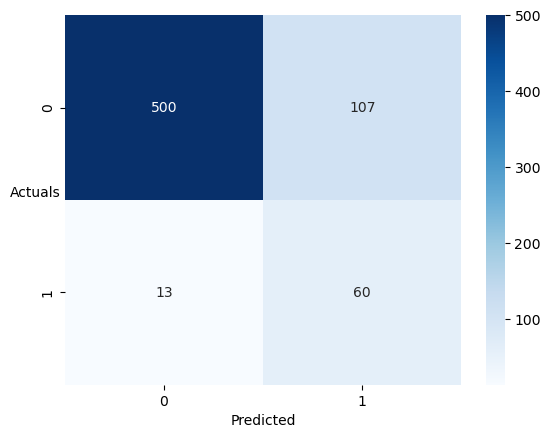

In [96]:
sns.heatmap((metrics.confusion_matrix(test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [97]:
print(metrics.classification_report(test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.975     0.824     0.893       607
         1.0      0.359     0.822     0.500        73

    accuracy                          0.824       680
   macro avg      0.667     0.823     0.696       680
weighted avg      0.909     0.824     0.851       680



In [109]:
y_prob_pred_test[:]

0      0.001860
1      0.001388
2      0.007675
3      0.001656
4      0.001978
         ...   
675    0.080990
676    0.055263
677    0.005115
678    0.003353
679    0.043602
Length: 680, dtype: float64

In [105]:
y_test

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
675    0.0
676    0.0
677    0.0
678    0.0
679    0.0
Name: Default, Length: 680, dtype: float64

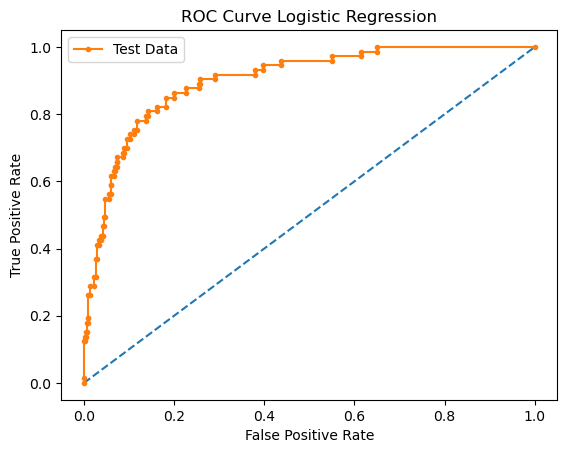

In [111]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_prob_pred_test[:])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Logistic Regression")
plt.show()

## PART A: Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [116]:
X_train = df_imputed_train.drop('Default', axis = 1)
y_train = df_imputed_train['Default']
X_test = df_imputed_test.drop('Default', axis = 1)
y_test = df_imputed_test['Default']

In [117]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [118]:
RF_model

RandomForestClassifier(random_state=42)

## PART A: Validate the Random Forest Model on test Dataset and state the performance metrics. Also state interpretation from the model

In [119]:
y_test_predict = RF_model.predict(X_test)
y_test_proba = RF_model.predict_proba(X_test)[:,1]
RF_test_accuracy = RF_model.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
RF_test_AUC = round(metrics.roc_auc_score(y_test,y_test_proba),2)
print(RF_test_AUC)

[[592  15]
 [ 43  30]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       607
         1.0       0.67      0.41      0.51        73

    accuracy                           0.91       680
   macro avg       0.80      0.69      0.73       680
weighted avg       0.90      0.91      0.91       680

0.9


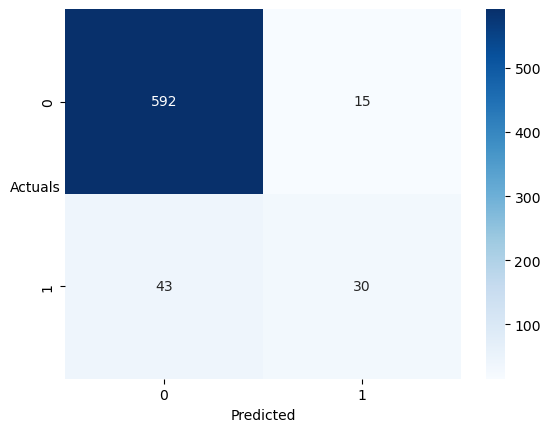

In [120]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

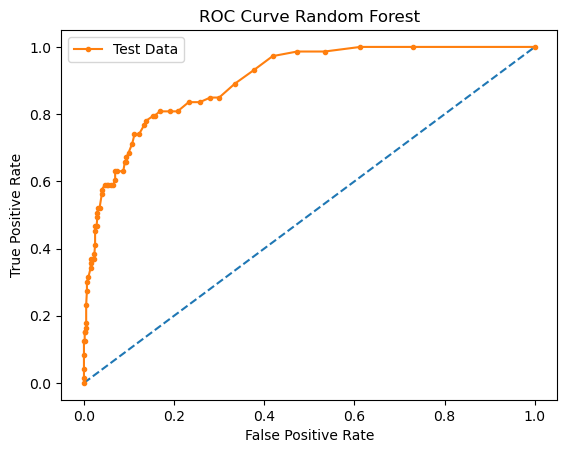

In [125]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_proba)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Random Forest")
plt.show()

## PART A: Build a LDA Model on Train Dataset. Also showcase your model building approach

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [129]:
clf = LinearDiscriminantAnalysis()
model_LDA=clf.fit(X_train,y_train)
model_LDA

LinearDiscriminantAnalysis()

In [133]:
pred_class_train = model_LDA.predict(X_train)
pred_class_test = model_LDA.predict(X_test)

## PART A: Validate the LDA Model on test Dataset and state the performance metrics. Also state interpretation from the model

In [134]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       607
         1.0       0.49      0.47      0.48        73

    accuracy                           0.89       680
   macro avg       0.71      0.70      0.71       680
weighted avg       0.89      0.89      0.89       680
 



In [135]:
pred_prob_test = model_LDA.predict_proba(X_test)

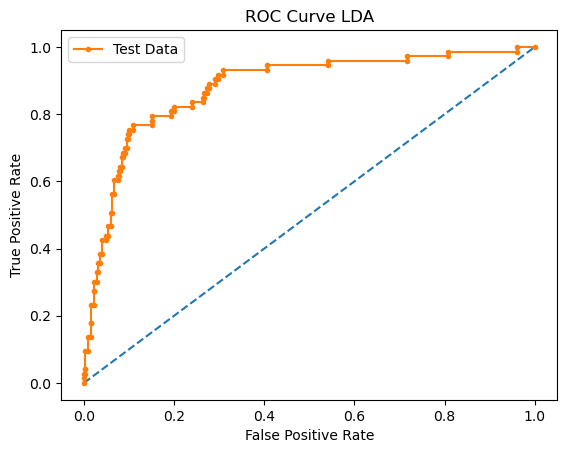

In [136]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve LDA")
plt.show()

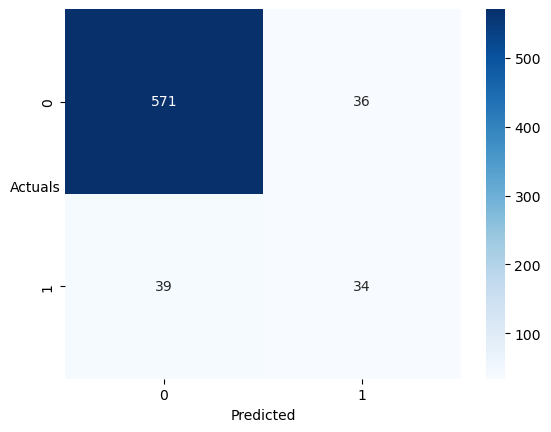

In [137]:
sns.heatmap((metrics.confusion_matrix(y_test, pred_class_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## PART A: Compare the performances of Logistic Regression, Random Forest, and LDA models (include ROC curve)

## PART A: Conclusions and Recommendations

## PART A: Univariate (4 marks) & Bivariate (6 marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

In [145]:
df_sub3

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Equity_to_Liability,Default
0,2.081168,-0.516860,-0.308453,-0.381617,-0.827491,0.214266,1.264019,-0.336136,-0.173342,-0.249595,...,-0.454730,-0.122180,-1.311543,0.191528,NaN,NaN,0.480066,0.261839,-1.062182,0
1,2.253378,NaN,-0.641492,1.067984,-0.839204,-0.650263,-1.002647,NaN,NaN,NaN,...,-0.054284,-0.671677,0.000709,0.638247,0.784135,-2.554392,NaN,NaN,-0.080368,1
2,0.537423,0.327609,-2.406308,0.191853,-0.839204,-2.574817,-0.248825,1.345182,1.610975,-0.797439,...,0.084190,-2.589857,0.073774,0.101821,-0.663251,-0.034903,2.463565,1.507954,0.773827,0
3,1.349273,-0.516860,-0.190007,0.574162,-0.762232,-0.120251,-0.098060,NaN,NaN,2.038620,...,0.799397,-0.114746,0.859157,-1.027225,0.090555,-1.638602,0.811180,0.517715,-0.253590,0
4,0.500521,-0.516860,-0.123400,1.330821,2.468920,0.527060,0.026710,-0.366632,-0.522386,-0.290186,...,0.593293,0.250024,1.128876,0.163944,0.898818,1.329212,NaN,2.048261,-0.744648,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,-0.631148,NaN,2.284616,-1.783427,0.673463,0.153444,1.144447,0.456280,-0.188904,-0.232000,...,NaN,0.358707,2.078725,-1.829095,-0.854727,1.631546,-0.316624,-0.468487,NaN,0
2054,-0.631148,-0.516860,0.238020,0.837003,-0.839204,-0.128939,-0.467173,-0.374922,-0.413612,1.261558,...,-2.130659,0.030434,-0.802821,0.017246,-0.723743,0.491103,NaN,NaN,1.610534,0
2055,-0.631148,NaN,NaN,0.215745,-0.839204,0.861576,-1.460139,NaN,-2.239449,-2.350231,...,-1.430365,1.384751,-0.517491,0.594879,1.746284,-0.098458,-0.824875,-1.044012,1.697065,0
2056,0.522047,-0.516860,1.871069,0.518410,1.691670,0.149100,-0.160445,1.059526,0.777679,-0.339383,...,1.015564,0.683158,0.379456,-0.778775,0.433925,-0.659439,0.554788,0.321721,1.875890,0


<AxesSubplot:xlabel='Default', ylabel='count'>

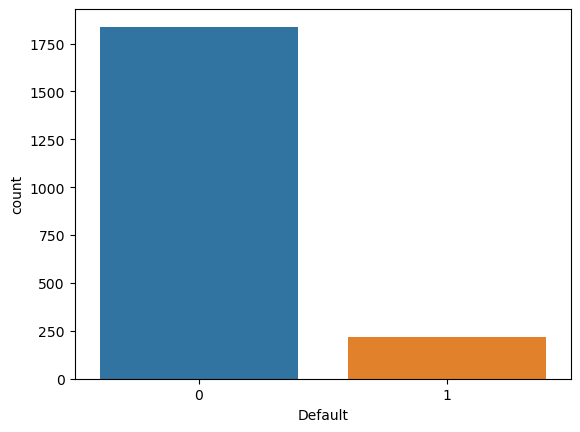

In [146]:
sns.countplot(data= df_sub3,x='Default')

<AxesSubplot:xlabel='_Total_debt_to_Total_net_worth'>

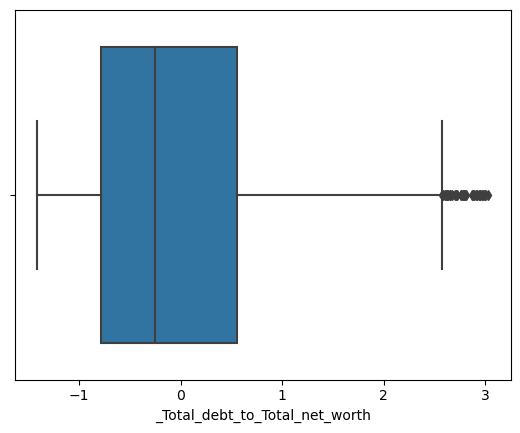

In [148]:
sns.boxplot(data= df_sub3,x='_Total_debt_to_Total_net_worth')

<AxesSubplot:xlabel='_Equity_to_Liability', ylabel='_Cash_Flow_to_Liability'>

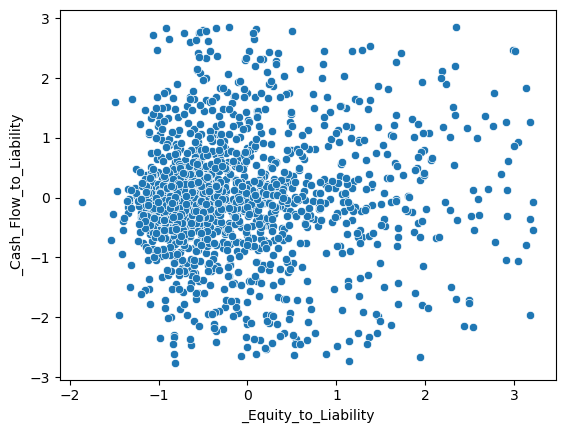

In [149]:
sns.scatterplot(data=df_sub3,x='_Equity_to_Liability',y='_Cash_Flow_to_Liability')

<AxesSubplot:xlabel='_Total_income_to_Total_expense', ylabel='_Total_expense_to_Assets'>

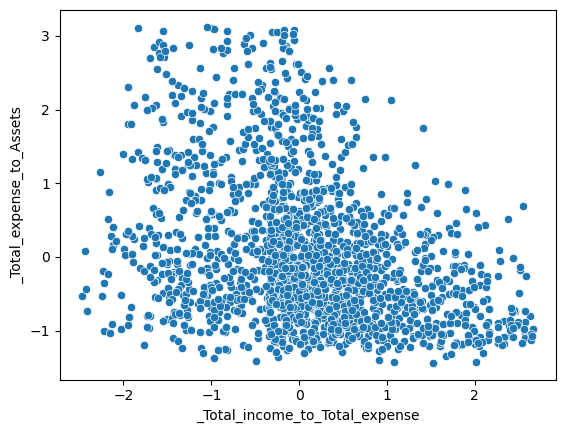

In [150]:
sns.scatterplot(data=df_sub3,x='_Total_income_to_Total_expense',y='_Total_expense_to_Assets')

<AxesSubplot:xlabel='_Cash_Turnover_Rate', ylabel='_Cash_Flow_to_Liability'>

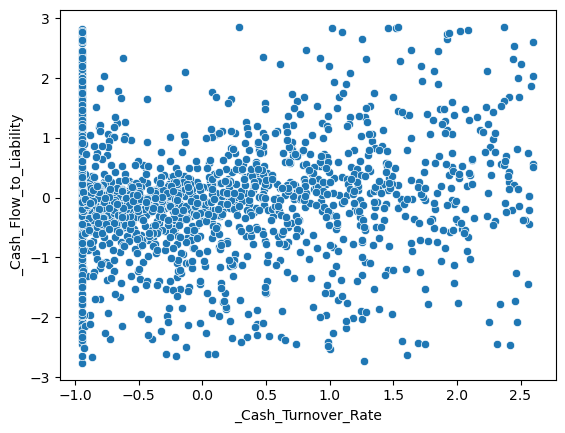

In [151]:
sns.scatterplot(data=df_sub3,x='_Cash_Turnover_Rate',y='_Cash_Flow_to_Liability')

<AxesSubplot:xlabel='Default', ylabel='_Inventory_to_Working_Capital'>

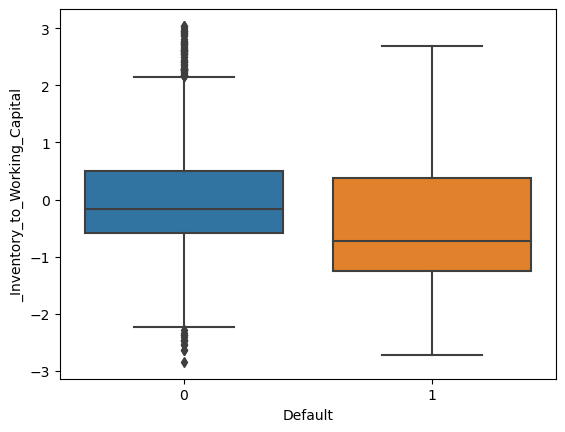

In [152]:
sns.boxplot(data=df_sub3,x='Default',y='_Inventory_to_Working_Capital')